In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
%matplotlib inline

# Importing Necessary Libraries 

In [2]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
%matplotlib inline

# Reading The DATA 

In [3]:
batsman_df = pd.read_csv('Batsman_Data.csv')

In [4]:
batsman_df.head()

,Unnamed: 0,Bat1,Runs,BF,SR,4s,6s,Opposition,Ground,Start Date,Match_ID,Batsman,Player_ID
0,1,DNB,-,-,-,-,-,v India,Nagpur,18 Dec 2009,ODI # 2933,Oshane Thomas,49619
1,2,DNB,-,-,-,-,-,v India,Kolkata,24 Dec 2009,ODI # 2935,Oshane Thomas,49619
2,3,DNB,-,-,-,-,-,v India,Delhi,27 Dec 2009,ODI # 2936,Oshane Thomas,49619
3,4,DNB,-,-,-,-,-,v Bangladesh,Dhaka,4 Jan 2010,ODI # 2937,Oshane Thomas,49619
4,5,DNB,-,-,-,-,-,v India,Dhaka,5 Jan 2010,ODI # 2938,Oshane Thomas,49619


In [5]:
bowler_df = pd.read_csv('Bowler_data.csv')

In [6]:
bowler_df

,Unnamed: 0,Overs,Mdns,Runs,Wkts,Econ,Ave,SR,Opposition,Ground,Start Date,Match_ID,Bowler,Player_ID
0,1,8.0,0,57,0,7.12,-,-,v India,Nagpur,18 Dec 2009,ODI # 2933,Suranga Lakmal,49619
1,2,10.0,0,55,2,5.50,27.50,30.0,v India,Kolkata,24 Dec 2009,ODI # 2935,Suranga Lakmal,49619
2,3,-,-,-,-,-,-,-,v India,Delhi,27 Dec 2009,ODI # 2936,Suranga Lakmal,49619
3,4,9.0,1,63,2,7.00,31.50,27.0,v Bangladesh,Dhaka,4 Jan 2010,ODI # 2937,Suranga Lakmal,49619
4,5,8.0,1,48,0,6.00,-,-,v India,Dhaka,5 Jan 2010,ODI # 2938,Suranga Lakmal,49619
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11113,11114,4.0,0,41,0,10.25,-,-,v India,Dubai (DSC),25 Sep 2018,ODI # 4046,Gulbadin Naib,352048
11114,11115,7.2,0,20,2,2.72,10.00,22.0,v Ireland,Dehradun,28 Feb 2019,ODI # 4100,Gulbadin Naib,352048
11115,11116,-,-,-,-,-,-,-,v Ireland,Dehradun,2 Mar 2019,ODI # 4101,Gulbadin Naib,352048
11116,11117,6.0,0,21,1,3.50,21.00,36.0,v Ireland,Dehradun,8 Mar 2019,ODI # 4108,Gulbadin Naib,352048


In [7]:
ground_avg_df = pd.read_csv('Ground_Averages.csv')

In [8]:
match_results_df = pd.read_csv('ODI_Match_Results.csv')

In [9]:
match_total_df = pd.read_csv('ODI_Match_Totals.csv')

In [10]:
players_df = pd.read_csv('WC_players.csv')

In [11]:
players_df.head()

,Player,ID,Country
0,Gulbadin Naib (c),352048,Afghanistan
1,Rashid Khan (vc),793463,Afghanistan
2,Aftab Alam,440963,Afghanistan
3,Asghar Afghan,320652,Afghanistan
4,Dawlat Zadran,516561,Afghanistan


### Checking the Null values and info about the data

In [12]:
batsman_df.isnull().sum()

Unnamed: 0    0
Bat1          0
Runs          0
BF            0
SR            0
4s            0
6s            0
Opposition    0
Ground        0
Start Date    0
Match_ID      0
Batsman       0
Player_ID     0
dtype: int64

In [13]:
batsman_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11149 entries, 0 to 11148
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  11149 non-null  int64 
 1   Bat1        11149 non-null  object
 2   Runs        11149 non-null  object
 3   BF          11149 non-null  object
 4   SR          11149 non-null  object
 5   4s          11149 non-null  object
 6   6s          11149 non-null  object
 7   Opposition  11149 non-null  object
 8   Ground      11149 non-null  object
 9   Start Date  11149 non-null  object
 10  Match_ID    11149 non-null  object
 11  Batsman     11149 non-null  object
 12  Player_ID   11149 non-null  int64 
dtypes: int64(2), object(11)
memory usage: 1.1+ MB


In [14]:
bowler_df.isnull().sum()

Unnamed: 0    0
Overs         0
Mdns          0
Runs          0
Wkts          0
Econ          0
Ave           0
SR            0
Opposition    0
Ground        0
Start Date    0
Match_ID      0
Bowler        0
Player_ID     0
dtype: int64

In [15]:
bowler_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11118 entries, 0 to 11117
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  11118 non-null  int64 
 1   Overs       11118 non-null  object
 2   Mdns        11118 non-null  object
 3   Runs        11118 non-null  object
 4   Wkts        11118 non-null  object
 5   Econ        11118 non-null  object
 6   Ave         11118 non-null  object
 7   SR          11118 non-null  object
 8   Opposition  11118 non-null  object
 9   Ground      11118 non-null  object
 10  Start Date  11118 non-null  object
 11  Match_ID    11118 non-null  object
 12  Bowler      11118 non-null  object
 13  Player_ID   11118 non-null  int64 
dtypes: int64(2), object(12)
memory usage: 1.2+ MB


In [16]:
ground_avg_df.isnull().sum()

Ground    0
Span      0
Mat       0
Won       0
Tied      0
NR        0
Runs      0
Wkts      0
Balls     0
Ave       0
RPO       0
dtype: int64

In [17]:
ground_avg_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106 entries, 0 to 105
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Ground  106 non-null    object 
 1   Span    106 non-null    object 
 2   Mat     106 non-null    int64  
 3   Won     106 non-null    int64  
 4   Tied    106 non-null    int64  
 5   NR      106 non-null    int64  
 6   Runs    106 non-null    int64  
 7   Wkts    106 non-null    int64  
 8   Balls   106 non-null    int64  
 9   Ave     106 non-null    float64
 10  RPO     106 non-null    float64
dtypes: float64(2), int64(7), object(2)
memory usage: 9.2+ KB


In [18]:
match_results_df.isnull().sum()

Unnamed: 0      0
Result          0
Margin          0
BR            716
Toss            0
Bat             0
Opposition      0
Ground          0
Start Date      0
Match_ID        0
Country         0
Country_ID      0
dtype: int64

In [19]:
match_results_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1322 entries, 0 to 1321
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1322 non-null   int64  
 1   Result      1322 non-null   object 
 2   Margin      1322 non-null   object 
 3   BR          606 non-null    float64
 4   Toss        1322 non-null   object 
 5   Bat         1322 non-null   object 
 6   Opposition  1322 non-null   object 
 7   Ground      1322 non-null   object 
 8   Start Date  1322 non-null   object 
 9   Match_ID    1322 non-null   object 
 10  Country     1322 non-null   object 
 11  Country_ID  1322 non-null   int64  
dtypes: float64(1), int64(2), object(9)
memory usage: 124.1+ KB


In [20]:
match_total_df.isnull().sum()

Unnamed: 0      0
Score           0
Overs           0
RPO             0
Target        676
Inns            0
Result          0
Opposition      0
Ground          0
Start Date      0
Match_ID        0
Country         0
Country_ID      0
dtype: int64

In [21]:
match_total_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296 entries, 0 to 1295
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1296 non-null   int64  
 1   Score       1296 non-null   object 
 2   Overs       1296 non-null   float64
 3   RPO         1296 non-null   object 
 4   Target      620 non-null    float64
 5   Inns        1296 non-null   int64  
 6   Result      1296 non-null   object 
 7   Opposition  1296 non-null   object 
 8   Ground      1296 non-null   object 
 9   Start Date  1296 non-null   object 
 10  Match_ID    1296 non-null   object 
 11  Country     1296 non-null   object 
 12  Country_ID  1296 non-null   int64  
dtypes: float64(2), int64(3), object(8)
memory usage: 131.8+ KB


In [22]:
players_df.isnull().sum()

Player     0
ID         0
Country    0
dtype: int64

In [23]:
players_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152 entries, 0 to 151
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Player   152 non-null    object
 1   ID       152 non-null    int64 
 2   Country  152 non-null    object
dtypes: int64(1), object(2)
memory usage: 3.7+ KB


In [24]:
df = [batsman_df,bowler_df,ground_avg_df,match_results_df,match_total_df,players_df]

In [25]:
def dimensions(df):
    for i in df:
        print(i.shape)

In [26]:
dimensions(df)

(11149, 13)
(11118, 14)
(106, 11)
(1322, 12)
(1296, 13)
(152, 3)


In [27]:
batsman_df.head()

,Unnamed: 0,Bat1,Runs,BF,SR,4s,6s,Opposition,Ground,Start Date,Match_ID,Batsman,Player_ID
0,1,DNB,-,-,-,-,-,v India,Nagpur,18 Dec 2009,ODI # 2933,Oshane Thomas,49619
1,2,DNB,-,-,-,-,-,v India,Kolkata,24 Dec 2009,ODI # 2935,Oshane Thomas,49619
2,3,DNB,-,-,-,-,-,v India,Delhi,27 Dec 2009,ODI # 2936,Oshane Thomas,49619
3,4,DNB,-,-,-,-,-,v Bangladesh,Dhaka,4 Jan 2010,ODI # 2937,Oshane Thomas,49619
4,5,DNB,-,-,-,-,-,v India,Dhaka,5 Jan 2010,ODI # 2938,Oshane Thomas,49619


### Splitting The Year into Its Corresponding month and day and year columns

In [28]:
# As our data set has start date or date column so lets first seaprate them into day, month and year wise and drop the orignal one
def seperate_date(df):
    for i in range(len(df)):
        if 'Start Date' in df[i].columns:
            df[i]['Year']=pd.to_datetime(df[i]['Start Date'])
            df[i]['Month']=df[i]['Year'].apply(lambda x:x.month) # Extracting Month
            df[i]['Day']=df[i]['Year'].apply(lambda x:x.day)  # Extracting day
            df[i]['year']=df[i]['Year'].apply(lambda x:x.year)  # Extracting year
            print(df[i].head())
            print("-------------------------")
        else:
            print("DataFrame", i, "does not have 'Start Date' column")
            print("-------------------------")

In [29]:
seperate_date(df)

   Unnamed: 0 Bat1 Runs BF SR 4s 6s    Opposition   Ground   Start Date  \
0           1  DNB    -  -  -  -  -       v India   Nagpur  18 Dec 2009   
1           2  DNB    -  -  -  -  -       v India  Kolkata  24 Dec 2009   
2           3  DNB    -  -  -  -  -       v India    Delhi  27 Dec 2009   
3           4  DNB    -  -  -  -  -  v Bangladesh    Dhaka   4 Jan 2010   
4           5  DNB    -  -  -  -  -       v India    Dhaka   5 Jan 2010   

     Match_ID        Batsman  Player_ID       Year  Month  Day  year  
0  ODI # 2933  Oshane Thomas      49619 2009-12-18     12   18  2009  
1  ODI # 2935  Oshane Thomas      49619 2009-12-24     12   24  2009  
2  ODI # 2936  Oshane Thomas      49619 2009-12-27     12   27  2009  
3  ODI # 2937  Oshane Thomas      49619 2010-01-04      1    4  2010  
4  ODI # 2938  Oshane Thomas      49619 2010-01-05      1    5  2010  
-------------------------
   Unnamed: 0 Overs Mdns Runs Wkts  Econ    Ave    SR    Opposition   Ground  \
0           1   8

In [30]:
batsman_df.head(5)

,Unnamed: 0,Bat1,Runs,BF,SR,4s,6s,Opposition,Ground,Start Date,Match_ID,Batsman,Player_ID,Year,Month,Day,year
0,1,DNB,-,-,-,-,-,v India,Nagpur,18 Dec 2009,ODI # 2933,Oshane Thomas,49619,2009-12-18,12,18,2009
1,2,DNB,-,-,-,-,-,v India,Kolkata,24 Dec 2009,ODI # 2935,Oshane Thomas,49619,2009-12-24,12,24,2009
2,3,DNB,-,-,-,-,-,v India,Delhi,27 Dec 2009,ODI # 2936,Oshane Thomas,49619,2009-12-27,12,27,2009
3,4,DNB,-,-,-,-,-,v Bangladesh,Dhaka,4 Jan 2010,ODI # 2937,Oshane Thomas,49619,2010-01-04,1,4,2010
4,5,DNB,-,-,-,-,-,v India,Dhaka,5 Jan 2010,ODI # 2938,Oshane Thomas,49619,2010-01-05,1,5,2010


In [31]:
bowler_df.head(5)

,Unnamed: 0,Overs,Mdns,Runs,Wkts,Econ,Ave,SR,Opposition,Ground,Start Date,Match_ID,Bowler,Player_ID,Year,Month,Day,year
0,1,8.0,0,57,0,7.12,-,-,v India,Nagpur,18 Dec 2009,ODI # 2933,Suranga Lakmal,49619,2009-12-18,12,18,2009
1,2,10.0,0,55,2,5.50,27.50,30.0,v India,Kolkata,24 Dec 2009,ODI # 2935,Suranga Lakmal,49619,2009-12-24,12,24,2009
2,3,-,-,-,-,-,-,-,v India,Delhi,27 Dec 2009,ODI # 2936,Suranga Lakmal,49619,2009-12-27,12,27,2009
3,4,9.0,1,63,2,7.00,31.50,27.0,v Bangladesh,Dhaka,4 Jan 2010,ODI # 2937,Suranga Lakmal,49619,2010-01-04,1,4,2010
4,5,8.0,1,48,0,6.00,-,-,v India,Dhaka,5 Jan 2010,ODI # 2938,Suranga Lakmal,49619,2010-01-05,1,5,2010


##### Drop irrelavent columns from the datasets


In [32]:
def drop_irrelevant(df): 
    for i in range(len(df)): 
        columns_to_drop = ['Unnamed: 0', 'Start Date', 'Year']
        irrelevant_columns = [col for col in columns_to_drop if col in df[i].columns]
        
        if irrelevant_columns: 
            df[i].drop(columns=irrelevant_columns, axis=1, inplace=True)
            print("DataFrame", i , "after dropping irrelevant columns:")
            print(df[i].head())  # Printing the DataFrame after dropping columns
            print("-------------------------")
        else:
            print("DataFrame", i, "does not have any irrelevant columns")
            print("-------------------------")

In [33]:
drop_irrelevant(df)

DataFrame 0 after dropping irrelevant columns:
  Bat1 Runs BF SR 4s 6s    Opposition   Ground    Match_ID        Batsman  \
0  DNB    -  -  -  -  -       v India   Nagpur  ODI # 2933  Oshane Thomas   
1  DNB    -  -  -  -  -       v India  Kolkata  ODI # 2935  Oshane Thomas   
2  DNB    -  -  -  -  -       v India    Delhi  ODI # 2936  Oshane Thomas   
3  DNB    -  -  -  -  -  v Bangladesh    Dhaka  ODI # 2937  Oshane Thomas   
4  DNB    -  -  -  -  -       v India    Dhaka  ODI # 2938  Oshane Thomas   

   Player_ID  Month  Day  year  
0      49619     12   18  2009  
1      49619     12   24  2009  
2      49619     12   27  2009  
3      49619      1    4  2010  
4      49619      1    5  2010  
-------------------------
DataFrame 1 after dropping irrelevant columns:
  Overs Mdns Runs Wkts  Econ    Ave    SR    Opposition   Ground    Match_ID  \
0   8.0    0   57    0  7.12      -     -       v India   Nagpur  ODI # 2933   
1  10.0    0   55    2  5.50  27.50  30.0       v India  Ko

In [34]:
batsman_df.head()

,Bat1,Runs,BF,SR,4s,6s,Opposition,Ground,Match_ID,Batsman,Player_ID,Month,Day,year
0,DNB,-,-,-,-,-,v India,Nagpur,ODI # 2933,Oshane Thomas,49619,12,18,2009
1,DNB,-,-,-,-,-,v India,Kolkata,ODI # 2935,Oshane Thomas,49619,12,24,2009
2,DNB,-,-,-,-,-,v India,Delhi,ODI # 2936,Oshane Thomas,49619,12,27,2009
3,DNB,-,-,-,-,-,v Bangladesh,Dhaka,ODI # 2937,Oshane Thomas,49619,1,4,2010
4,DNB,-,-,-,-,-,v India,Dhaka,ODI # 2938,Oshane Thomas,49619,1,5,2010


In [35]:
encode_cols_batsman = ['Bat1','Runs','BF','SR','4s','6s','Opposition','Ground','Match_ID','Batsman']

In [36]:
df_list=[batsman_df,bowler_df,ground_avg_df,match_results_df,match_total_df,players_df]


### Performing Feature Engineering (Encoding Categorical Columns)

In [37]:
from sklearn.preprocessing import LabelEncoder

In [38]:
# As we seen there are object type of data avilabe in the all the dataset so lets seaprate them and encode them into numeric form .
# lets seaprate the catogorical data & numerical data

numerics = ['int8', 'int16', 'int32', 'int64', 'float16', 'float32', 'float64']

def get_categorical_columns(df_list):
    cat_col_list = []  # List to store categorical column names for each DataFrame

    for df in df_list:
        cat_col = []  # List to store categorical column names for the current DataFrame
        features = df.columns.values.tolist()

        for col in features:
            if df[col].dtype not in numerics:  # Check if the column's data type is non-numeric
                cat_col.append(col)

        cat_col_list.append(cat_col)

    return cat_col_list

def label_encode_categorical_columns(df_list):
    label = LabelEncoder()

    categorical_columns_list = get_categorical_columns(df_list)

    for i, cat_col in enumerate(categorical_columns_list):
        for col in cat_col:
            encoded_values = label.fit_transform(df_list[i][col])
            df_list[i][col] = encoded_values 

In [39]:
label_encode_categorical_columns(df_list) 

In [40]:
batsman_df.sample(10)

,Bat1,Runs,BF,SR,4s,6s,Opposition,Ground,Match_ID,Batsman,Player_ID,Month,Day,year
10124,234,136,86,717,1,1,15,40,1829,58,272477,3,31,2019
10521,0,1,2,1,1,1,21,59,1583,107,524049,2,21,2017
10421,253,146,154,1422,21,2,21,17,1711,116,533956,3,6,2018
9124,112,66,71,1888,2,2,20,7,699,129,56143,7,31,2009
9074,251,145,139,1711,22,1,21,59,405,129,56143,2,4,2007
7877,241,140,95,639,18,11,4,38,1542,68,308967,10,7,2016
2750,203,121,118,1469,22,1,7,126,614,47,43906,8,29,2008
2029,319,0,0,0,0,0,21,58,1365,53,40618,2,15,2015
2575,112,66,91,933,2,1,13,132,1586,56,44932,2,25,2017
5289,299,169,67,1044,13,1,3,122,1559,73,277906,12,4,2016


In [41]:
match_results_df.sample(10)

,Result,Margin,BR,Toss,Bat,Opposition,Ground,Match_ID,Country,Country_ID,Month,Day,year
1227,6,120,5.0,1,2,13,76,704,6,7,1,19,2019
84,3,73,56.0,1,1,16,89,48,6,7,6,7,2013
965,3,99,71.0,1,1,17,44,553,8,8,7,10,2017
329,6,99,62.0,2,2,2,86,183,9,4,8,20,2014
264,3,133,NaN,1,2,14,30,144,2,25,2,20,2014
614,3,136,NaN,2,2,1,61,349,3,1,9,5,2015
214,3,110,68.0,1,1,13,19,119,6,7,11,30,2013
610,3,134,NaN,1,2,13,36,346,5,5,8,26,2015
1315,6,120,7.0,2,2,16,34,754,2,25,5,17,2019
249,6,48,NaN,1,1,5,45,137,5,5,1,22,2014


In [42]:
match_results_df.isnull().sum()

Result          0
Margin          0
BR            716
Toss            0
Bat             0
Opposition      0
Ground          0
Match_ID        0
Country         0
Country_ID      0
Month           0
Day             0
year            0
dtype: int64

In [43]:
match_total_df.isnull().sum()

Score           0
Overs           0
RPO             0
Target        676
Inns            0
Result          0
Opposition      0
Ground          0
Match_ID        0
Country         0
Country_ID      0
Month           0
Day             0
year            0
dtype: int64

In [44]:
## performing the iterative imputation to columns match_results ,match_total
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

imputer = IterativeImputer()
df_list2 =[match_results_df,match_total_df]

def treat_missing_values(df_list2):
    for i in range(len(df_list2)):
        df_imputed = imputer.fit_transform(df_list2[i])
        df_list2[i]=pd.DataFrame(df_imputed,columns =df_list2[i].columns)
        print("Data Frame",i,"after imputation")
        print(df_list2[i].isnull().sum().sum())


In [45]:
treat_missing_values(df_list2)

Data Frame 0 after imputation
0
Data Frame 1 after imputation
0


In [46]:
match_total_df = df_list2[0]

match_results_df = df_list2[1]

In [47]:
match_total_df.isnull().sum()

Result        0
Margin        0
BR            0
Toss          0
Bat           0
Opposition    0
Ground        0
Match_ID      0
Country       0
Country_ID    0
Month         0
Day           0
year          0
dtype: int64

In [48]:
match_results_df.head()

,Score,Overs,RPO,Target,Inns,Result,Opposition,Ground,Match_ID,Country,Country_ID,Month,Day,year
0,404.0,48.3,165.0,241.723435,1.0,4.0,5.0,57.0,0.0,6.0,7.0,1.0,3.0,2013.0
1,115.0,48.0,25.0,251.000000,2.0,1.0,11.0,57.0,0.0,4.0,6.0,1.0,3.0,2013.0
2,93.0,48.5,18.0,168.000000,2.0,1.0,5.0,29.0,1.0,6.0,7.0,1.0,6.0,2013.0
3,120.0,43.4,48.0,176.027214,1.0,4.0,11.0,29.0,1.0,4.0,6.0,1.0,6.0,2013.0
4,199.0,40.0,146.0,306.000000,2.0,1.0,1.0,63.0,2.0,8.0,8.0,1.0,11.0,2013.0


In [49]:
batsman_df.head()

,Bat1,Runs,BF,SR,4s,6s,Opposition,Ground,Match_ID,Batsman,Player_ID,Month,Day,year
0,319,0,0,0,0,0,9,92,759,113,49619,12,18,2009
1,319,0,0,0,0,0,9,78,761,113,49619,12,24,2009
2,319,0,0,0,0,0,9,37,762,113,49619,12,27,2009
3,319,0,0,0,0,0,4,38,763,113,49619,1,4,2010
4,319,0,0,0,0,0,9,38,764,113,49619,1,5,2010


In [50]:
bowler_df.head()

,Overs,Mdns,Runs,Wkts,Econ,Ave,SR,Opposition,Ground,Match_ID,Bowler,Player_ID,Month,Day,year
0,49,1,59,1,412,0,0,9,92,759,138,49619,12,18,2009
1,12,1,57,3,316,103,77,9,78,761,138,49619,12,24,2009
2,0,0,0,0,0,0,0,9,37,762,138,49619,12,27,2009
3,55,2,66,3,406,120,70,4,38,763,138,49619,1,4,2010
4,49,2,49,1,349,0,0,9,38,764,138,49619,1,5,2010


In [51]:
print(batsman_df.columns)
print('*' * 100)
print(bowler_df.columns)

Index(['Bat1', 'Runs', 'BF', 'SR', '4s', '6s', 'Opposition', 'Ground',
       'Match_ID', 'Batsman', 'Player_ID', 'Month', 'Day', 'year'],
      dtype='object')
****************************************************************************************************
Index(['Overs', 'Mdns', 'Runs', 'Wkts', 'Econ', 'Ave', 'SR', 'Opposition',
       'Ground', 'Match_ID', 'Bowler', 'Player_ID', 'Month', 'Day', 'year'],
      dtype='object')


### Performing Of Merging Operations (Inner) On all Sub-datasets based on common columns

In [52]:
#Lets Create a master dataset and the build the model 
# so first we are going to merge 2 dataset and then further  
batsman_join_bowler=pd.merge(batsman_df,bowler_df,on=['Match_ID','Player_ID','Opposition','Ground','Month','Day','year'], how='inner')
batsman_join_bowler.shape

(11118, 22)

In [53]:

batsman_join_bowler.columns

Index(['Bat1', 'Runs_x', 'BF', 'SR_x', '4s', '6s', 'Opposition', 'Ground',
       'Match_ID', 'Batsman', 'Player_ID', 'Month', 'Day', 'year', 'Overs',
       'Mdns', 'Runs_y', 'Wkts', 'Econ', 'Ave', 'SR_y', 'Bowler'],
      dtype='object')

In [54]:
#Lets Join ground_df
batsman_join_bowler_GrondAvg=pd.merge(batsman_join_bowler,ground_avg_df,on=['Ground'], how='inner')
batsman_join_bowler_GrondAvg

,Bat1,Runs_x,BF,SR_x,4s,6s,Opposition,Ground,Match_ID,Batsman,...,Span,Mat,Won,Tied,NR,Runs,Wkts_y,Balls,Ave_y,RPO
0,319,0,0,0,0,0,9,92,759,113,...,6,16,14,0,2,6890,202,7508,34.10,5.50
1,12,7,21,1757,24,10,9,92,84,20,...,6,16,14,0,2,6890,202,7508,34.10,5.50
2,217,128,104,240,3,1,9,92,391,20,...,6,16,14,0,2,6890,202,7508,34.10,5.50
3,184,111,81,572,20,1,9,92,759,11,...,6,16,14,0,2,6890,202,7508,34.10,5.50
4,319,0,0,0,0,0,9,92,927,25,...,6,16,14,0,2,6890,202,7508,34.10,5.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9074,217,128,117,1780,22,2,10,36,1817,117,...,4,4,4,0,0,1664,56,1987,29.71,5.02
9075,180,109,84,389,13,9,10,36,1819,117,...,4,4,4,0,0,1664,56,1987,29.71,5.02
9076,203,121,121,1409,22,2,10,36,1809,42,...,4,4,4,0,0,1664,56,1987,29.71,5.02
9077,167,103,119,969,1,1,10,36,1810,42,...,4,4,4,0,0,1664,56,1987,29.71,5.02


In [55]:
#Lets Join match_results & match_totals
OD_Total_result=pd.merge(match_results_df,match_total_df,on=['Ground','Country','Country_ID','Month','Day','year','Opposition'], how='inner')
OD_Total_result

,Score,Overs,RPO,Target,Inns,Result_x,Opposition,Ground,Match_ID_x,Country,Country_ID,Month,Day,year,Result_y,Margin,BR,Toss,Bat,Match_ID_y
0,404.0,48.3,165.0,241.723435,1.0,4.0,5.0,57.0,0.0,6.0,7.0,1.0,3.0,2013.0,6.0,160.0,52.000182,1.0,1.0,0.0
1,115.0,48.0,25.0,251.000000,2.0,1.0,11.0,57.0,0.0,4.0,6.0,1.0,3.0,2013.0,3.0,160.0,52.728414,2.0,2.0,0.0
2,93.0,48.5,18.0,168.000000,2.0,1.0,5.0,29.0,1.0,6.0,7.0,1.0,6.0,2013.0,3.0,3.0,20.689046,1.0,2.0,1.0
3,120.0,43.4,48.0,176.027214,1.0,4.0,11.0,29.0,1.0,4.0,6.0,1.0,6.0,2013.0,6.0,3.0,21.548194,2.0,1.0,1.0
4,199.0,40.0,146.0,306.000000,2.0,1.0,1.0,63.0,2.0,8.0,8.0,1.0,11.0,2013.0,3.0,10.0,19.527705,1.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1291,750.0,50.0,309.0,382.947700,1.0,1.0,3.0,72.0,739.0,6.0,7.0,5.0,17.0,2019.0,3.0,99.0,3.000000,1.0,1.0,755.0
1292,753.0,49.3,315.0,341.000000,2.0,4.0,11.0,72.0,739.0,3.0,1.0,5.0,17.0,2019.0,6.0,99.0,3.000000,2.0,2.0,755.0
1293,27.0,33.0,38.0,211.000000,2.0,0.0,6.0,7.0,740.0,0.0,40.0,5.0,19.0,2019.0,0.0,0.0,32.327406,2.0,2.0,757.0
1294,187.0,31.5,249.0,352.000000,2.0,0.0,3.0,60.0,741.0,6.0,7.0,5.0,19.0,2019.0,0.0,0.0,29.815762,1.0,2.0,758.0


In [56]:
#Lets Join batsman_join_bowler_GrondAvg & OD_Total_result
batsman_join_bowler_GrondAvg_OD=pd.merge(batsman_join_bowler_GrondAvg,OD_Total_result,on=['Ground','Month','Day','year'], how='inner')
batsman_join_bowler_GrondAvg_OD

,Bat1,Runs_x,BF,SR_x,4s,6s,Opposition_x,Ground,Match_ID,Batsman,...,Opposition_y,Match_ID_x,Country,Country_ID,Result_y,Margin,BR,Toss,Bat,Match_ID_y
0,140,86,14,677,1,1,15,1,1225,113,...,11.0,123.0,8.0,8.0,3.0,154.0,53.000000,2.0,1.0,126.0
1,140,86,14,677,1,1,15,1,1225,113,...,14.0,123.0,6.0,7.0,6.0,154.0,53.000000,1.0,2.0,126.0
2,0,1,108,1,1,1,15,1,1225,80,...,11.0,123.0,8.0,8.0,3.0,154.0,53.000000,2.0,1.0,126.0
3,0,1,108,1,1,1,15,1,1225,80,...,14.0,123.0,6.0,7.0,6.0,154.0,53.000000,1.0,2.0,126.0
4,277,158,141,4,2,1,15,1,1225,78,...,11.0,123.0,8.0,8.0,3.0,154.0,53.000000,2.0,1.0,126.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039,191,115,131,1056,2,2,10,36,1819,99,...,14.0,719.0,7.0,3.0,6.0,144.0,63.153507,1.0,1.0,733.0
1040,284,161,16,1375,22,9,10,36,1819,13,...,13.0,719.0,8.0,8.0,3.0,144.0,62.762323,2.0,2.0,733.0
1041,284,161,16,1375,22,9,10,36,1819,13,...,14.0,719.0,7.0,3.0,6.0,144.0,63.153507,1.0,1.0,733.0
1042,180,109,84,389,13,9,10,36,1819,117,...,13.0,719.0,8.0,8.0,3.0,144.0,62.762323,2.0,2.0,733.0


In [57]:
players_df = players_df.rename(columns={'ID':'Player_ID'})

In [58]:
players_df.head()

,Player,Player_ID,Country
0,42,352048,0
1,118,793463,0
2,5,440963,0
3,13,320652,0
4,30,516561,0


In [59]:
master_df_after_join = pd.merge(batsman_join_bowler_GrondAvg_OD,players_df,on =['Player_ID','Country'],how='inner')

In [60]:
master_df_after_join['Batting Average'] = master_df_after_join['Bat1']/master_df_after_join['Inns']

In [61]:
master_df_after_join['Bowling Average'] = master_df_after_join['Runs_y'] / master_df_after_join['Wkts_y']

In [62]:
# filtering the rows that consist of zeros  in a way by considering only the list 
# of values into my master_df 

master_df_after_join = master_df_after_join[master_df_after_join['BF']>0]


In [63]:
master_df_after_join.head()

,Bat1,Runs_x,BF,SR_x,4s,6s,Opposition_x,Ground,Match_ID,Batsman,...,Country_ID,Result_y,Margin,BR,Toss,Bat,Match_ID_y,Player,Batting Average,Bowling Average
0,0,1,108,1,1,1,15,1,1225,80,...,8.0,3.0,154.0,53.00000,2.0,1.0,126.0,80,0.0,2.733333
1,0,1,2,1,1,1,15,1,1227,80,...,8.0,6.0,73.0,2.00000,1.0,2.0,128.0,80,0.0,3.933333
2,2,2,130,518,1,1,0,1,1750,80,...,8.0,3.0,167.0,67.89146,1.0,2.0,662.0,80,1.0,4.600000
4,277,158,141,4,2,1,15,1,1225,78,...,8.0,3.0,154.0,53.00000,2.0,1.0,126.0,78,277.0,0.000000
5,205,122,99,256,18,11,15,1,1227,78,...,8.0,6.0,73.0,2.00000,1.0,2.0,128.0,78,102.5,0.000000


### Calculating strike rate 

In [64]:
# calculate strike rate of Batting for each player
master_df_after_join['strike Rate (Batting)'] = (master_df_after_join['Bat1']/master_df_after_join['BF'])*100

In [65]:
master_df_after_join.head()

,Bat1,Runs_x,BF,SR_x,4s,6s,Opposition_x,Ground,Match_ID,Batsman,...,Result_y,Margin,BR,Toss,Bat,Match_ID_y,Player,Batting Average,Bowling Average,strike Rate (Batting)
0,0,1,108,1,1,1,15,1,1225,80,...,3.0,154.0,53.00000,2.0,1.0,126.0,80,0.0,2.733333,0.000000
1,0,1,2,1,1,1,15,1,1227,80,...,6.0,73.0,2.00000,1.0,2.0,128.0,80,0.0,3.933333,0.000000
2,2,2,130,518,1,1,0,1,1750,80,...,3.0,167.0,67.89146,1.0,2.0,662.0,80,1.0,4.600000,1.538462
4,277,158,141,4,2,1,15,1,1225,78,...,3.0,154.0,53.00000,2.0,1.0,126.0,78,277.0,0.000000,196.453901
5,205,122,99,256,18,11,15,1,1227,78,...,6.0,73.0,2.00000,1.0,2.0,128.0,78,102.5,0.000000,207.070707


In [66]:
master_df_after_join['Economy Rate (Bowling)'] = (master_df_after_join['Runs_y']/master_df_after_join['Overs_y'])

In [67]:
# Calculate the total Maiden Overs for each player
master_df_after_join['maiden Overs Total'] = master_df_after_join['Mdns'].sum()

In [68]:
master_df_after_join.head()

,Bat1,Runs_x,BF,SR_x,4s,6s,Opposition_x,Ground,Match_ID,Batsman,...,BR,Toss,Bat,Match_ID_y,Player,Batting Average,Bowling Average,strike Rate (Batting),Economy Rate (Bowling),maiden Overs Total
0,0,1,108,1,1,1,15,1,1225,80,...,53.00000,2.0,1.0,126.0,80,0.0,2.733333,0.000000,0.845361,262
1,0,1,2,1,1,1,15,1,1227,80,...,2.00000,1.0,2.0,128.0,80,0.0,3.933333,0.000000,1.194332,262
2,2,2,130,518,1,1,0,1,1750,80,...,67.89146,1.0,2.0,662.0,80,1.0,4.600000,1.538462,1.674757,262
4,277,158,141,4,2,1,15,1,1225,78,...,53.00000,2.0,1.0,126.0,78,277.0,0.000000,196.453901,0.000000,262
5,205,122,99,256,18,11,15,1,1227,78,...,2.00000,1.0,2.0,128.0,78,102.5,0.000000,207.070707,0.000000,262


In [69]:
batting_average = master_df_after_join['Batting Average']
bowling_average = master_df_after_join['Bowling Average']
strike_rate_batting = master_df_after_join['strike Rate (Batting)']
economy_rate_bowling = master_df_after_join['Economy Rate (Bowling)']
maiden_overs = master_df_after_join['maiden Overs Total']

### Normalizing The Data

In [70]:
def min_max_scaling(x):
    return(x - x.min()) / (x.max() - x.min())

In [71]:
#Step 2: Normalize the selected performance metrics
# You can use Min-Max Scaling or Z-score normalization
normalized_batting_average = min_max_scaling(batting_average)
normalized_bowling_average = min_max_scaling(bowling_average) 
normalized_strike_rate_batting = min_max_scaling(strike_rate_batting)
normalized_economy_rate_bowling = min_max_scaling(economy_rate_bowling)

In [72]:
# Step 3: Assign weights to each performance metric

batting_weight = 0.3 

bowling_weight = 0.25

strike_rate_weight = 0.2

economy_rate_weight = 0.25

In [73]:
# Step 4: Calculate the composite performance score for each player
master_df_after_join['Player Performance Score'] = (
    batting_weight * normalized_batting_average +
    bowling_weight * normalized_bowling_average +
    strike_rate_weight * normalized_strike_rate_batting +
    economy_rate_weight * normalized_economy_rate_bowling )

In [74]:
master_df_after_join

,Bat1,Runs_x,BF,SR_x,4s,6s,Opposition_x,Ground,Match_ID,Batsman,...,Toss,Bat,Match_ID_y,Player,Batting Average,Bowling Average,strike Rate (Batting),Economy Rate (Bowling),maiden Overs Total,Player Performance Score
0,0,1,108,1,1,1,15,1,1225,80,...,2.0,1.0,126.0,80,0.0,2.733333,0.000000,0.845361,262,0.179688
1,0,1,2,1,1,1,15,1,1227,80,...,1.0,2.0,128.0,80,0.0,3.933333,0.000000,1.194332,262,0.256694
2,2,2,130,518,1,1,0,1,1750,80,...,1.0,2.0,662.0,80,1.0,4.600000,1.538462,1.674757,262,0.324796
4,277,158,141,4,2,1,15,1,1225,78,...,2.0,1.0,126.0,78,277.0,0.000000,196.453901,0.000000,262,0.267204
5,205,122,99,256,18,11,15,1,1227,78,...,1.0,2.0,128.0,78,102.5,0.000000,207.070707,0.000000,262,0.102335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
502,207,123,103,128,22,1,3,5,1574,57,...,1.0,1.0,484.0,57,207.0,1.041667,200.970874,1.000000,262,0.327119
506,154,96,109,946,18,1,17,5,1590,93,...,1.0,1.0,501.0,94,154.0,1.979167,141.284404,2.311436,262,0.423807
507,5,3,130,535,13,1,15,5,1485,93,...,1.0,2.0,393.0,94,2.5,1.208333,3.846154,1.367925,262,0.166335
508,255,147,74,849,1,1,3,5,1574,93,...,1.0,1.0,484.0,94,255.0,0.937500,344.594595,0.900000,262,0.363639


In [75]:
master_df_after_join.shape 

(444, 55)

### Detecting and removing Outliers 

In [76]:
master_df_after_join.skew() 

Bat1                       -0.233887
Runs_x                     -0.346075
BF                         -0.445824
SR_x                       -0.039165
4s                          0.578048
6s                          2.952126
Opposition_x               -0.516344
Ground                      0.970068
Match_ID                   -0.326713
Batsman                    -0.105322
Player_ID                   0.979422
Month                      -0.134240
Day                        -0.024541
year                       -0.322862
Overs_x                     1.262778
Mdns                        1.473151
Runs_y                      1.019444
Wkts_x                      1.420556
Econ                        0.740863
Ave_x                       1.770862
SR_y                        1.372929
Bowler                     -0.097655
Span                       -2.101193
Mat                         3.289249
Won                         3.289249
Tied                        0.000000
NR                          0.000000
R

In [77]:
master_df_after_join.skew()[(master_df_after_join.skew() >= 0.5) & (master_df_after_join.skew() >= -0.5)]

4s                        0.578048
6s                        2.952126
Ground                    0.970068
Player_ID                 0.979422
Overs_x                   1.262778
Mdns                      1.473151
Runs_y                    1.019444
Wkts_x                    1.420556
Econ                      0.740863
Ave_x                     1.770862
SR_y                      1.372929
Mat                       3.289249
Won                       3.289249
Runs                      2.546417
Wkts_y                    2.866807
Balls                     2.933363
Ave_y                     3.219416
RPO_x                     1.697543
Country_ID                2.054187
BR                        1.052424
Bowling Average           1.558220
strike Rate (Batting)     5.879068
Economy Rate (Bowling)    1.403963
dtype: float64

In [78]:
skew_col=['4s','6s','Ground','Player_ID','Overs_x','Mdns','Runs_y','Wkts_x','Econ','Ave_x','SR_y','Mat','Won','Runs', 'Wkts_y', 'Balls', 'Ave_y', 'RPO_x','BR','Country_ID','Bowling Average','Bowling Average','Economy Rate (Bowling)']
len(skew_col)

23

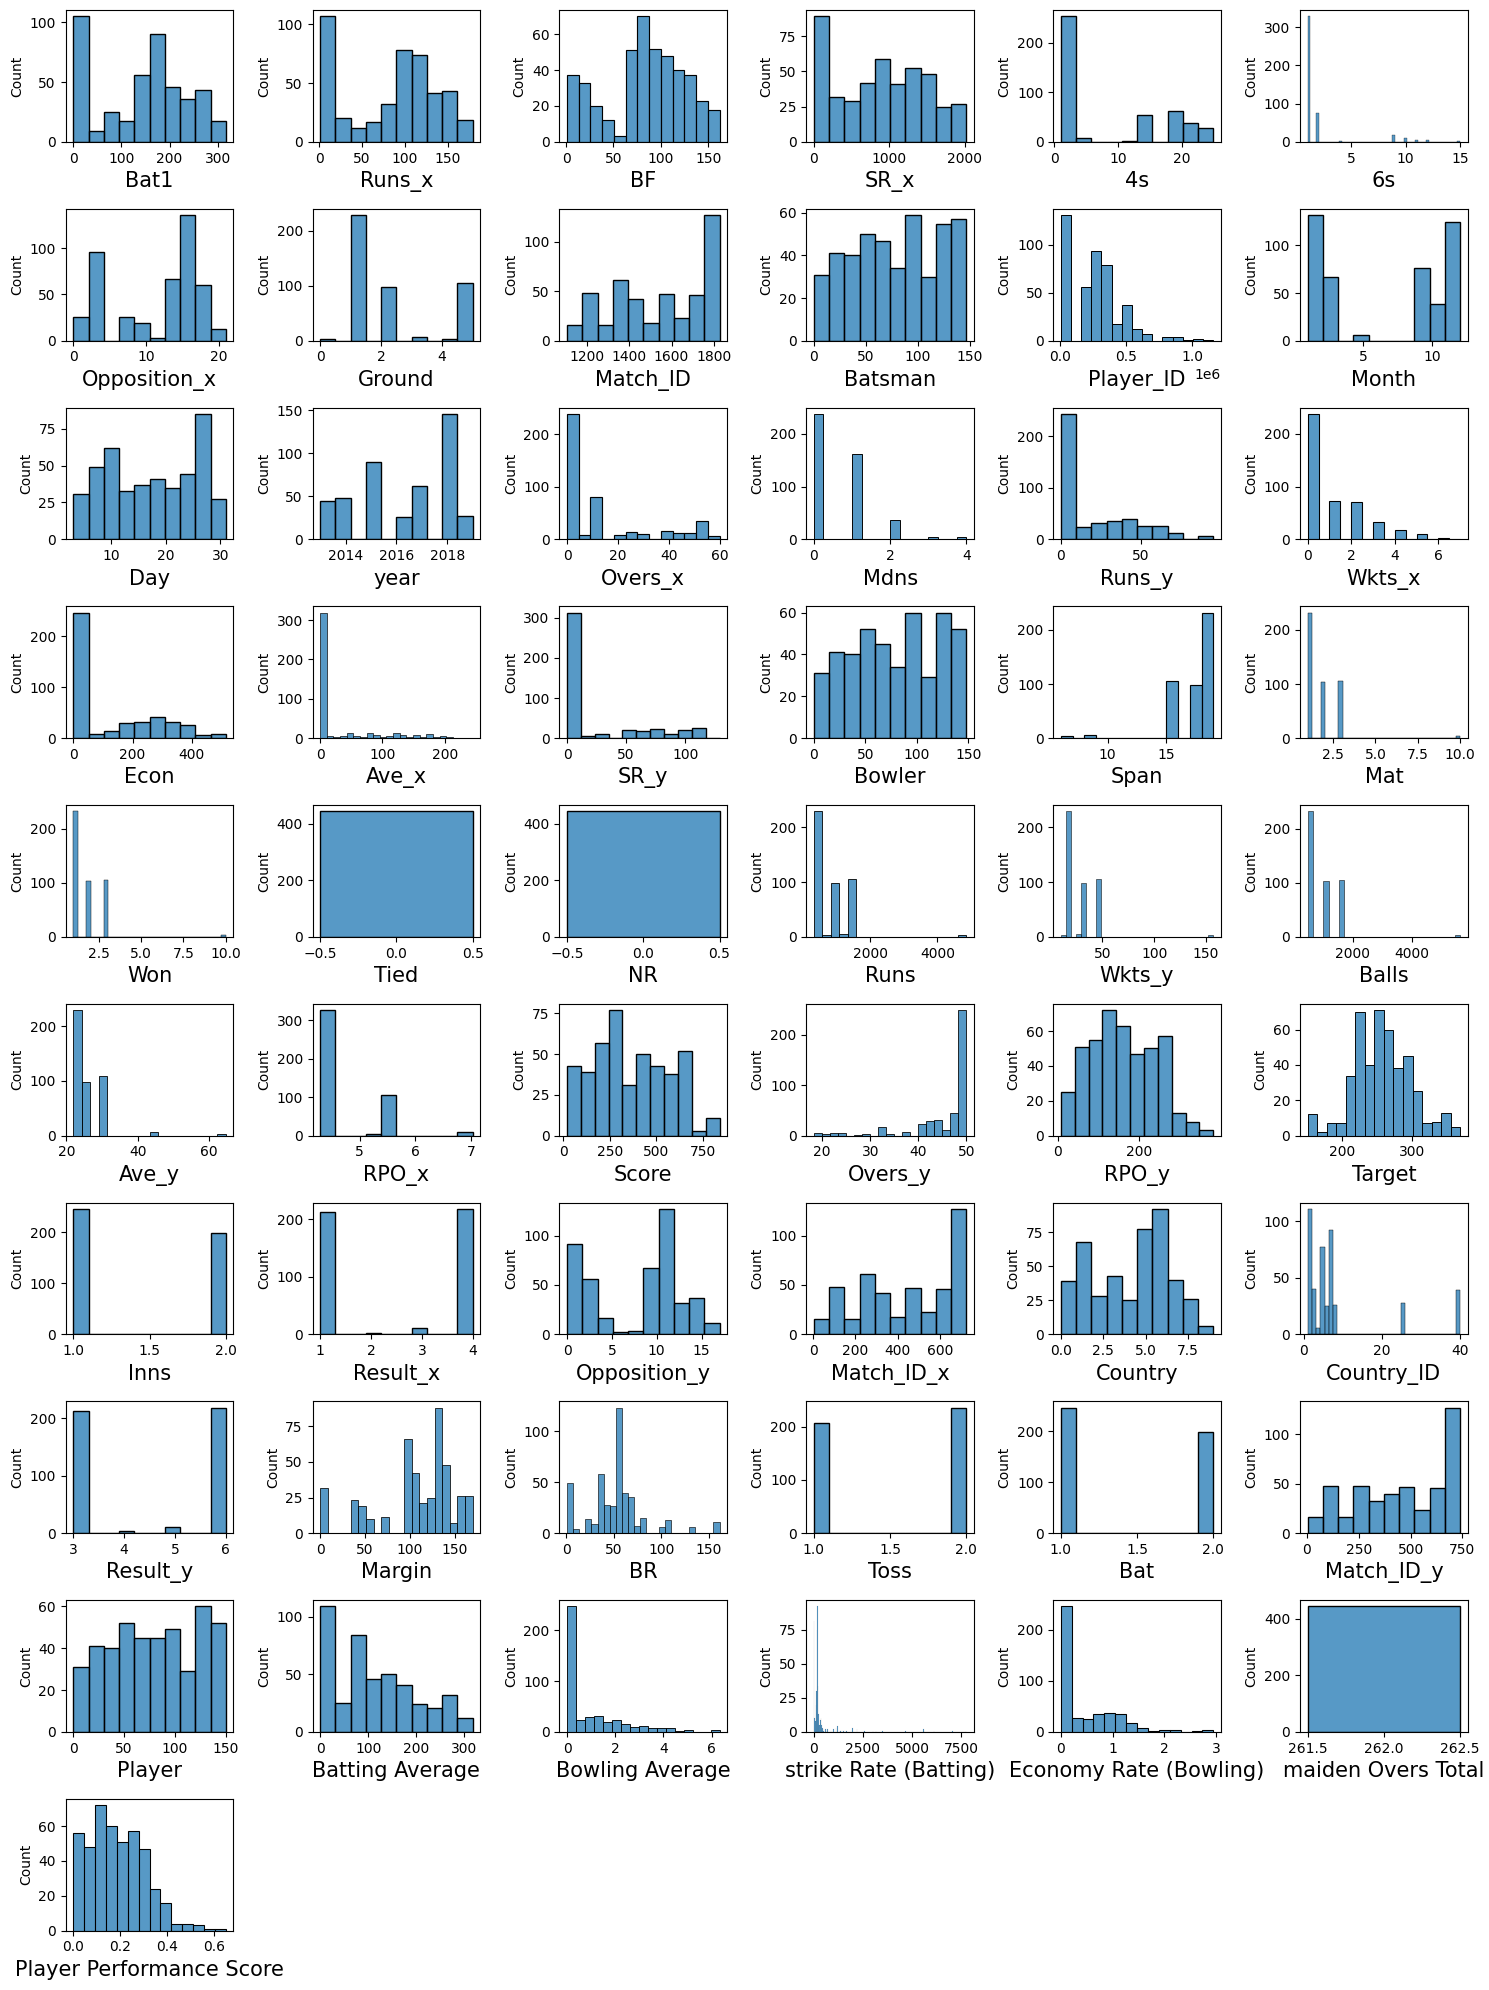

In [79]:
#Let's see the how data is distributed or Graphical analysis of all features
plt.figure(figsize=(15,20))
plotnumber=1
for column in master_df_after_join:
    if plotnumber<=60:
        ax=plt.subplot(10,6,plotnumber)
        sns.histplot(master_df_after_join[column])
        plt.xlabel(column,fontsize=15)
    plotnumber+=1
plt.tight_layout()

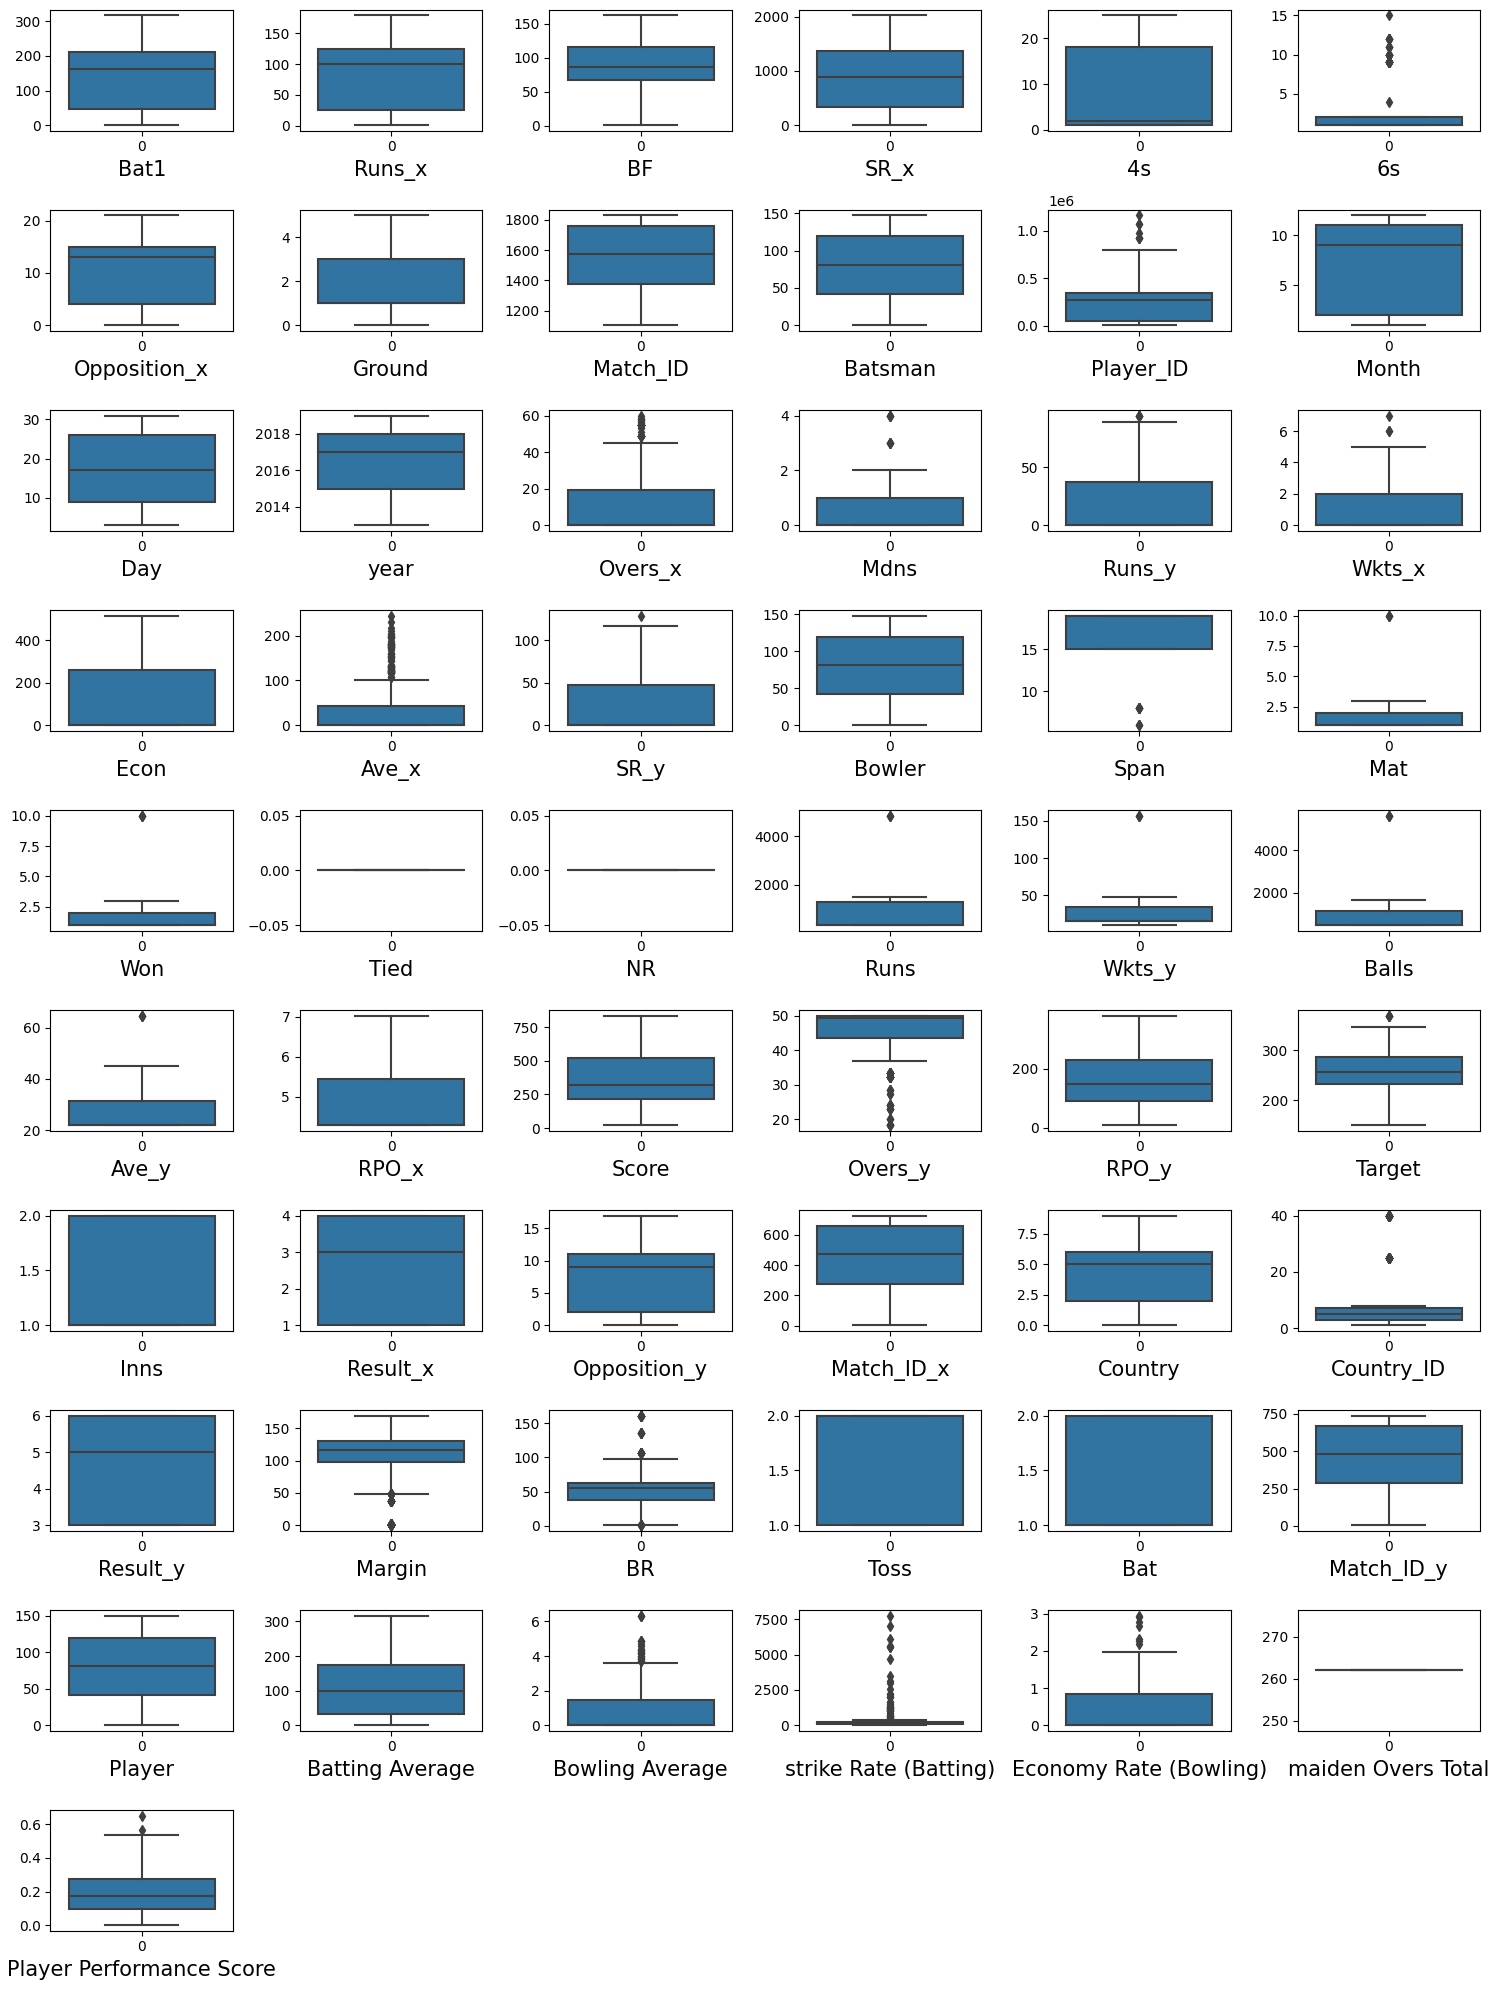

In [80]:
# Now almost All skewness we removed so move further
#Let's check for the Outliers
plt.figure(figsize=(15,20))
plotnumber=1
for column in master_df_after_join:
    if plotnumber<=60:
        ax=plt.subplot(10,6,plotnumber)
        sns.boxplot(master_df_after_join[column])
        plt.xlabel(column,fontsize=15)
    plotnumber+=1
plt.tight_layout()

In [81]:
# So from graph we can see the outlier are present in the some columns so lets remove them first 
outliers_col=['Margin', 'BR','Overs_y','Target','Ground','Span','strike Rate (Batting)','Player Performance Score']

In [82]:
master_df_after_join.head(5)

,Bat1,Runs_x,BF,SR_x,4s,6s,Opposition_x,Ground,Match_ID,Batsman,...,Toss,Bat,Match_ID_y,Player,Batting Average,Bowling Average,strike Rate (Batting),Economy Rate (Bowling),maiden Overs Total,Player Performance Score
0,0,1,108,1,1,1,15,1,1225,80,...,2.0,1.0,126.0,80,0.0,2.733333,0.000000,0.845361,262,0.179688
1,0,1,2,1,1,1,15,1,1227,80,...,1.0,2.0,128.0,80,0.0,3.933333,0.000000,1.194332,262,0.256694
2,2,2,130,518,1,1,0,1,1750,80,...,1.0,2.0,662.0,80,1.0,4.600000,1.538462,1.674757,262,0.324796
4,277,158,141,4,2,1,15,1,1225,78,...,2.0,1.0,126.0,78,277.0,0.000000,196.453901,0.000000,262,0.267204
5,205,122,99,256,18,11,15,1,1227,78,...,1.0,2.0,128.0,78,102.5,0.000000,207.070707,0.000000,262,0.102335


In [83]:
# Remove the outliers by using Z score
from scipy.stats import zscore

z_score=zscore(master_df_after_join[outliers_col])
z_score_abs=np.abs(z_score)
filter_entry=(z_score_abs<3).all(axis=1)
master_after_join=master_df_after_join[filter_entry]
master_after_join.head()

,Bat1,Runs_x,BF,SR_x,4s,6s,Opposition_x,Ground,Match_ID,Batsman,...,Toss,Bat,Match_ID_y,Player,Batting Average,Bowling Average,strike Rate (Batting),Economy Rate (Bowling),maiden Overs Total,Player Performance Score
0,0,1,108,1,1,1,15,1,1225,80,...,2.0,1.0,126.0,80,0.0,2.733333,0.000000,0.845361,262,0.179688
1,0,1,2,1,1,1,15,1,1227,80,...,1.0,2.0,128.0,80,0.0,3.933333,0.000000,1.194332,262,0.256694
2,2,2,130,518,1,1,0,1,1750,80,...,1.0,2.0,662.0,80,1.0,4.600000,1.538462,1.674757,262,0.324796
4,277,158,141,4,2,1,15,1,1225,78,...,2.0,1.0,126.0,78,277.0,0.000000,196.453901,0.000000,262,0.267204
5,205,122,99,256,18,11,15,1,1227,78,...,1.0,2.0,128.0,78,102.5,0.000000,207.070707,0.000000,262,0.102335


In [84]:
# Use 'Player Performance Score' as the target variable for the prediction model
x = master_after_join[['Bat1', 'Runs_x', 'BF', 'SR_x', '4s', '6s', 'Opposition_x', 'Ground',
          'Match_ID', 'Batsman', 'Player_ID', 'Month', 'Day', 'year', 'Overs_x',
          'Mdns', 'Runs_y', 'Wkts_x', 'Econ', 'Ave_x', 'SR_y', 'Bowler', 'Span',
          'Mat', 'Won', 'Tied', 'NR', 'Runs', 'Wkts_y', 'Balls', 'Ave_y', 'RPO_x',
          'Result_x', 'Margin', 'BR', 'Toss', 'Bat', 'Opposition_y', 'Match_ID_x',
          'Country', 'Country_ID', 'Score', 'Overs_y', 'RPO_y', 'Target', 'Inns',
          'Result_y', 'Match_ID_y']]

In [85]:
y = master_after_join['Player Performance Score']  # Target column

In [86]:
print(x.shape, y.shape)

(408, 48) (408,)


In [87]:
# Performing stadardization
from sklearn.preprocessing import StandardScaler

scale=StandardScaler()
x_scaled=scale.fit_transform(x)

### splitting the data into training and testing 

In [88]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 42)

### Fitting the data into model and performing training 

In [89]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

### making some predictions

In [90]:
predictions = lr.predict(X_test)

### Perfroming model evaluation methods to see how well the model performance 

In [91]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


mae = mean_absolute_error(y_test, predictions)

mse = mean_squared_error(y_test, predictions)

rmse = np.sqrt(mse)

r_squared = r2_score(y_test, predictions)

print(f"Mean Absolute Error: {mae}\nMean Squared Error: {mse}\nRoot Mean Squared Error: {rmse}\nR-squared: {r_squared}")


Mean Absolute Error: 0.023539407054509045
Mean Squared Error: 0.0009194615941505927
Root Mean Squared Error: 0.03032262511971206
R-squared: 0.9180409902037779
